Goal :  Prediction of the health insurance cost for each individual

Data Description : https://www.kaggle.com/mirichoi0218/insurance
With the help of collected information, model will predict insurance cost for indivisual.

Importing and Description of Data

In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns

In [33]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.shape

(1338, 7)

In [7]:
data.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
30   male    37.430  3         no      northeast  5428.72770     1
             38.830  1         no      southeast  18963.17192    1
             44.220  2         no      southeast  4266.16580     1
31   female  21.755  0         no      northwest  4134.08245     1
                                                                ..
47   male    36.190  0         yes     southeast  41676.08110    1
             36.200  1         no      southwest  8068.18500     1
             38.940  2         yes     southeast  44202.65360    1
             47.520  1         no      southeast  8083.91980     1
18   female  20.790  0         no      southeast  1607.51010     1
Length: 1337, dtype: int64

In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [11]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [12]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Graphical Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


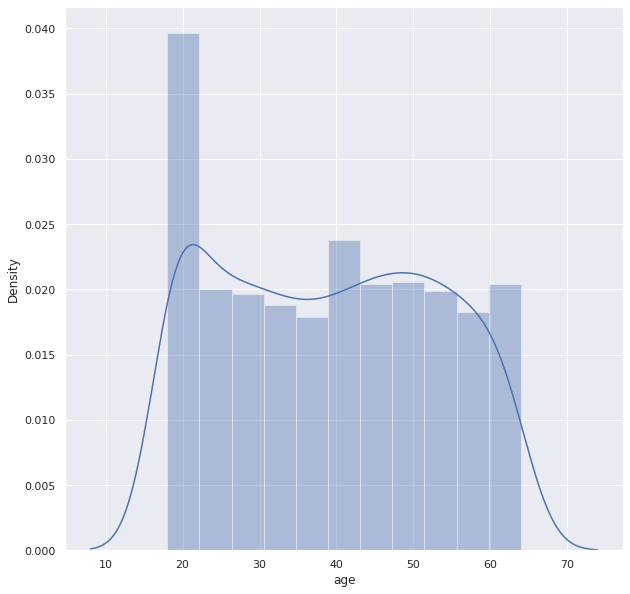

In [14]:
sns.set()
plt.figure(figsize=[10,10])
sns.distplot(data["age"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


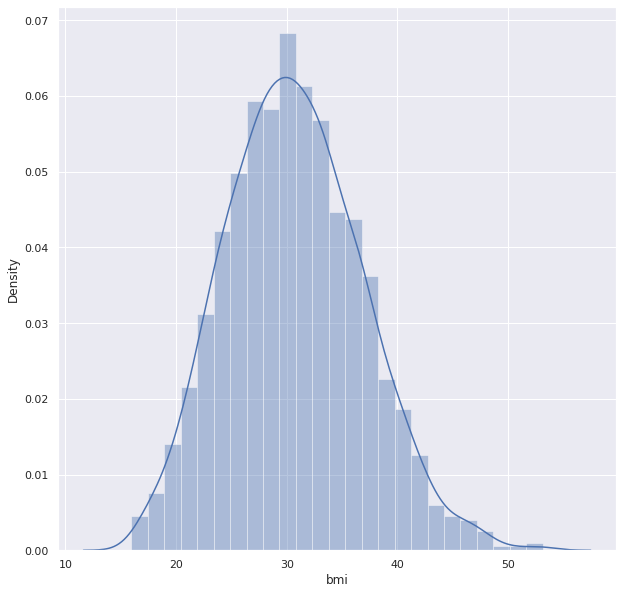

In [15]:
sns.set()
plt.figure(figsize=[10,10])
sns.distplot(data["bmi"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


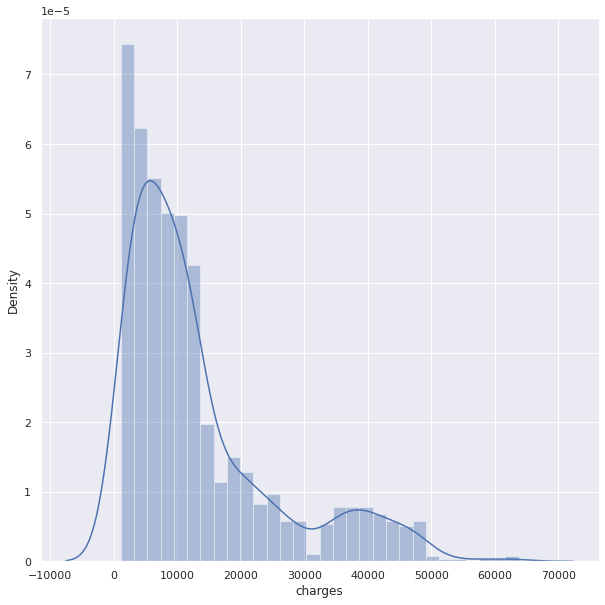

In [16]:
sns.set()
plt.figure(figsize=[10,10])
sns.distplot(data["charges"])
plt.show()

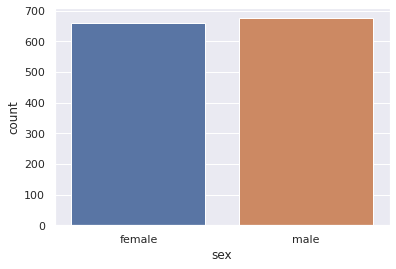

In [22]:
sns.countplot(x="sex",data=data)

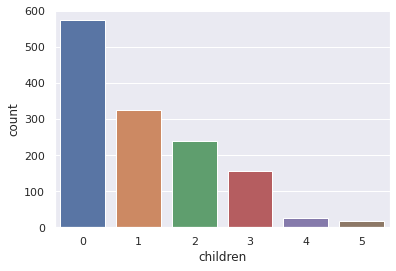

In [23]:
sns.countplot(x="children",data=data)

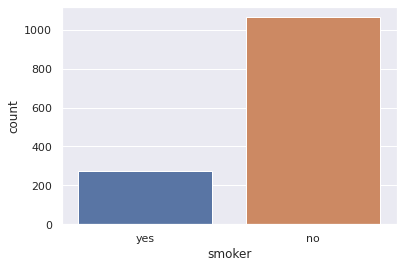

In [24]:
sns.countplot(x="smoker",data=data)

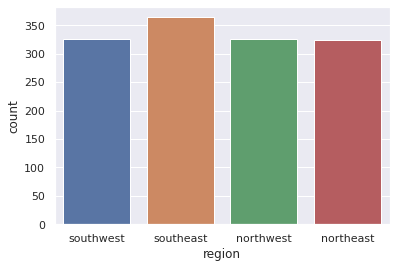

In [25]:
sns.countplot(x="region",data=data)

Encoding

In [40]:
data.replace({"sex":{"male":0,"female":1}},inplace=True)

In [37]:
data.replace({"smoker":{"no":0,"yes":1}},inplace=True)

In [36]:
data.replace({"region":{"southwest":0,"southeast":1,"northwest":2,"northeast":3}},inplace=True)

In [41]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


Splitting of Data

In [42]:
 x=data.drop("charges",axis=1)
 x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2


In [44]:
y=data.charges

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=2)

Model Building

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
LR=LinearRegression()

In [56]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
x_train_prediction=LR.predict(x_train)

In [58]:
from sklearn import metrics

In [60]:
metrics.r2_score(y_train,x_train_prediction)

0.7519923667088932

In [61]:
x_test_prediction=LR.predict(x_test)

In [62]:
metrics.r2_score(y_test,x_test_prediction)

0.7445422986536503

Predictive System

In [71]:
input_data=(31,1,25.74,0,0,1)

In [72]:
toarray=np.asarray(input_data)

In [73]:
reshaped=toarray.reshape(1,-1)

In [74]:
Y=LR.predict(reshaped)
print(Y)

[3911.4481614]
